In [46]:
import pandas as pd
import seaborn as sns

In [47]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

In [48]:

darts= pd.read_csv('darts.csv' )

In [49]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [50]:
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
xCoord        800 non-null float64
yCoord        800 non-null float64
competitor    800 non-null object
dtypes: float64(2), object(1)
memory usage: 18.9+ KB


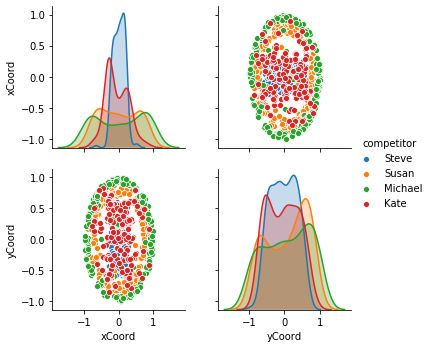

In [51]:
#some data analysis

sns.pairplot(darts,hue="competitor")

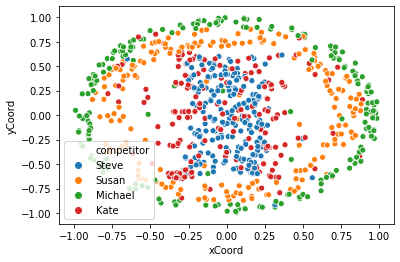

In [55]:
sns.scatterplot(x="xCoord",y="yCoord", data=darts,hue="competitor")

In [52]:
#deep learning

In [58]:
model=Sequential()

# Add 3 dense layers
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))

# if you are using a one hot encoding scheme where one channel 
#has probabilities of one class and other channel has probabilities of another,
#then you must use a Softmax activation.


model.add(Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_14 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_15 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 52        
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
#converting data into categorical format

darts.competitor= pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [61]:
#data conversion is successful

darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0
4,-0.051120,0.598946,2


In [62]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [63]:
#splitting the data into test and train sets


from sklearn.model_selection import train_test_split
train_coord,test_coord,train_comp,test_comp = train_test_split(coordinates, competitors, test_size=0.25,  random_state = 7)

In [66]:
# Train your model on the training data for 50 epochs
model.fit(train_coord, train_comp, epochs=50)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(test_coord, test_comp)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/50
600/600 [==============================] - 0s 528us/step - loss: 0.5879 - acc: 0.7950
Epoch 2/50
600/600 [==============================] - 0s 447us/step - loss: 0.5810 - acc: 0.8000
Epoch 3/50
600/600 [==============================] - 0s 451us/step - loss: 0.5815 - acc: 0.7983
Epoch 4/50
600/600 [==============================] - 0s 467us/step - loss: 0.5812 - acc: 0.8017
Epoch 5/50
600/600 [==============================] - 0s 487us/step - loss: 0.5769 - acc: 0.8000
Epoch 6/50
600/600 [==============================] - 0s 467us/step - loss: 0.5771 - acc: 0.8050
Epoch 7/50
600/600 [==============================] - 0s 440us/step - loss: 0.5783 - acc: 0.8033
Epoch 8/50
600/600 [==============================] - 0s 441us/step - loss: 0.5788 - acc: 0.7967
Epoch 9/50
600/600 [==============================] - 0s 440us/step - loss: 0.5766 - acc: 0.8017
Epoch 10/50
600/600 [==============================] - 0s 455us/step - loss: 0.5774 - acc: 0.8033
Epoch 11/50
600/600 [========